In [1]:
pip install matplotlib-venn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [3]:
df = pd.read_csv('/home/tarun/Documents/minor project/after_preprocessing.csv')

In [4]:
df

,Unnamed: 0,Cluster_1_date,Date of screening,Age at presentation (in yrs),Age at last follow up,Sex (m/f),Religion,"Education at presentation (Primary 1 to 5, High school 6-10, higher secondary 11 and 12)",Max education attained,Rural/Urban,...,Max Duration of resolution of symptoms before recurrence/relapse (in days),No of relapses/exacerbations,Off-medications duration (to add all such durations over follow-up in days),"Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}",mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups),maximum period of compliance at lgb (in days) (longest streak of good compliance),total duration of medication treatment at LGB(in days) (from first consultation to last follow-up),frequency of follow up at lgb (to write down follow-up dates),total number of follow up at LGBRIMH,Number of In patient cares
0,0,2020-06-22,2015-02-28,10.0,16.0,male,islam,primary,NaN,rural,...,nil,0.0,1649,NaN,12.400000,180,212,"07-12-2019, 21-12-2019, 17-01-2020, 11-04-2020...",6.0,0.0
1,1,2020-06-22,2019-05-20,8.0,10.0,female,islam,NaN,NaN,rural,...,13,6.0,22,satisfactory,1.660000,395,626,"24-06-2019, 29-07-2019, 09-09-2019, 21-10-2019...",12.0,0.0
2,2,2020-06-22,2019-09-24,17.0,18.0,female,islam,primary,primary,rural,...,nil,0.0,30,poor,1.780000,240,330,"19-12-2019, 01-02-2020, 20-03-2020, 22-06-2020",4.0,0.0
3,3,2020-06-22,2014-03-03,7.0,17.0,male,islam,NaN,NaN,rural,...,19,6.0,58,good,NaN,NaN,1320,"31-03-2014, 29-04-2014, 29-05-2014, 04-07-2014...",69.0,0.0
4,4,2020-06-22,2020-06-18,10.0,10.0,male,hinduism,primary,primary,rural,...,60,1.0,20,good,1.000000,90,90,"22-06-2020,30-09-2020",2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,514,2019-10-15,2019-10-15,13.0,13.0,male,islam,high school,NaN,rural,...,0,0.0,0,poor,0.000000,0,0,0,0.0,0.0
515,515,2019-10-15,2019-02-08,16.0,16.0,male,islam,high school,NaN,rural,...,34,4.0,60,poor,1.866667,123,280,"14-03-2019,11-06-2019,29-07-2019,06-09-2019,05...",5.0,0.0
516,516,2019-10-15,2017-07-31,2.0,7.0,female,islam,NaN,NaN,rural,...,326,13.0,75,poor,2.397917,739,1151,"04-09-2019,06-10-2017,06-11-2017,08-12-2017,08...",16.0,0.0
517,517,2019-10-15,2019-10-15,9.0,9.0,male,islam,primary,NaN,rural,...,0,0.0,0,poor,0.000000,0,30,0,0.0,0.0


In [5]:
df.drop('Cluster_1_date',axis = 1,inplace = True)
df.drop('Date of screening',axis = 1,inplace = True)
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [6]:
df

,Age at presentation (in yrs),Age at last follow up,Sex (m/f),Religion,"Education at presentation (Primary 1 to 5, High school 6-10, higher secondary 11 and 12)",Max education attained,Rural/Urban,Distance from LGBRIMH (in KM),Occupation of parents,Socioeconomic status,...,Max Duration of resolution of symptoms before recurrence/relapse (in days),No of relapses/exacerbations,Off-medications duration (to add all such durations over follow-up in days),"Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}",mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups),maximum period of compliance at lgb (in days) (longest streak of good compliance),total duration of medication treatment at LGB(in days) (from first consultation to last follow-up),frequency of follow up at lgb (to write down follow-up dates),total number of follow up at LGBRIMH,Number of In patient cares
0,10.0,16.0,male,islam,primary,NaN,rural,53.0,NaN,NaN,...,nil,0.0,1649,NaN,12.400000,180,212,"07-12-2019, 21-12-2019, 17-01-2020, 11-04-2020...",6.0,0.0
1,8.0,10.0,female,islam,NaN,NaN,rural,62.0,NaN,NaN,...,13,6.0,22,satisfactory,1.660000,395,626,"24-06-2019, 29-07-2019, 09-09-2019, 21-10-2019...",12.0,0.0
2,17.0,18.0,female,islam,primary,primary,rural,55.0,NaN,NaN,...,nil,0.0,30,poor,1.780000,240,330,"19-12-2019, 01-02-2020, 20-03-2020, 22-06-2020",4.0,0.0
3,7.0,17.0,male,islam,NaN,NaN,rural,102.0,NaN,NaN,...,19,6.0,58,good,NaN,NaN,1320,"31-03-2014, 29-04-2014, 29-05-2014, 04-07-2014...",69.0,0.0
4,10.0,10.0,male,hinduism,primary,primary,rural,29.0,tempo driver,lses,...,60,1.0,20,good,1.000000,90,90,"22-06-2020,30-09-2020",2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,13.0,13.0,male,islam,high school,NaN,rural,63.0,NaN,NaN,...,0,0.0,0,poor,0.000000,0,0,0,0.0,0.0
515,16.0,16.0,male,islam,high school,NaN,rural,77.0,NaN,NaN,...,34,4.0,60,poor,1.866667,123,280,"14-03-2019,11-06-2019,29-07-2019,06-09-2019,05...",5.0,0.0
516,2.0,7.0,female,islam,NaN,NaN,rural,51.0,father is a cultivator,NaN,...,326,13.0,75,poor,2.397917,739,1151,"04-09-2019,06-10-2017,06-11-2017,08-12-2017,08...",16.0,0.0
517,9.0,9.0,male,islam,primary,NaN,rural,17.0,NaN,NaN,...,0,0.0,0,poor,0.000000,0,30,0,0.0,0.0


Label Encoder: Overview
Label Encoding is a technique used to convert categorical data (non-numeric) into numerical form so machine learning models can process it effectively. It assigns each unique category in a column to an integer value.

Why is Label Encoding Needed?
Machine learning algorithms require numerical inputs for training.
Most models cannot directly process strings or categorical data.
Label Encoding provides a simple and effective way to represent categories numerically.
How Label Encoder Works
For a categorical column with n unique values, Label Encoder assigns integers starting from 0 to n-1 in alphabetical order or based on occurrence.

Example:
Category	Encoded Value
"Male"	0
"Female"	1
"Other"	2


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Get the list of all columns in the DataFrame
cols = df.columns.tolist()

# Loop through each column and apply LabelEncoder to categorical columns
for column in cols:
    if df[column].dtype == 'object':  # Check if the column is of object (categorical) type
        df[column] = le.fit_transform(df[column].astype(str))  # Convert to string and encode

# Fill any remaining missing values with 0
#df.fillna(0, inplace=True)

# Check the DataFrame after encoding
print(df.head())


   Age at presentation (in yrs)  Age at last follow up  Sex (m/f)  Religion  \
0                          10.0                   16.0          1         2   
1                           8.0                   10.0          0         2   
2                          17.0                   18.0          0         2   
3                           7.0                   17.0          1         2   
4                          10.0                   10.0          1         1   

   Education at presentation (Primary 1 to 5, High school 6-10, higher secondary 11 and 12)  \
0                                                  6                                          
1                                                  2                                          
2                                                  6                                          
3                                                  2                                          
4                                                 

In [8]:
# Display the first few rows of the DataFrame
print(df.head())

# Check the data types of the columns
print(df.dtypes)

# Separate features (X) and target (y)
X = df.drop(columns=['Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}'])  # Replace 'target' with your actual target column name
y = df['Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}']


   Age at presentation (in yrs)  Age at last follow up  Sex (m/f)  Religion  \
0                          10.0                   16.0          1         2   
1                           8.0                   10.0          0         2   
2                          17.0                   18.0          0         2   
3                           7.0                   17.0          1         2   
4                          10.0                   10.0          1         1   

   Education at presentation (Primary 1 to 5, High school 6-10, higher secondary 11 and 12)  \
0                                                  6                                          
1                                                  2                                          
2                                                  6                                          
3                                                  2                                          
4                                                 

In [9]:
df

,Age at presentation (in yrs),Age at last follow up,Sex (m/f),Religion,"Education at presentation (Primary 1 to 5, High school 6-10, higher secondary 11 and 12)",Max education attained,Rural/Urban,Distance from LGBRIMH (in KM),Occupation of parents,Socioeconomic status,...,Max Duration of resolution of symptoms before recurrence/relapse (in days),No of relapses/exacerbations,Off-medications duration (to add all such durations over follow-up in days),"Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}",mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups),maximum period of compliance at lgb (in days) (longest streak of good compliance),total duration of medication treatment at LGB(in days) (from first consultation to last follow-up),frequency of follow up at lgb (to write down follow-up dates),total number of follow up at LGBRIMH,Number of In patient cares
0,10.0,16.0,1,2,6,2,1,53.0,95,3,...,172,0.0,22,1,12.400000,80,134,64,6.0,0.0
1,8.0,10.0,0,2,2,2,1,62.0,95,3,...,17,6.0,37,4,1.660000,172,289,292,12.0,0.0
2,17.0,18.0,0,2,6,6,1,55.0,95,3,...,172,0.0,42,3,1.780000,115,200,192,4.0,0.0
3,7.0,17.0,1,2,2,2,1,102.0,95,3,...,43,6.0,77,0,NaN,292,44,409,69.0,0.0
4,10.0,10.0,1,1,6,6,1,29.0,102,1,...,138,1.0,33,0,1.000000,283,355,261,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,13.0,13.0,1,2,0,2,1,63.0,95,3,...,0,0.0,0,3,0.000000,0,0,1,0.0,0.0
515,16.0,16.0,1,2,0,2,1,77.0,95,3,...,84,4.0,79,3,1.866667,32,171,123,5.0,0.0
516,2.0,7.0,0,2,2,2,1,51.0,23,3,...,81,13.0,87,3,2.397917,258,24,28,16.0,0.0
517,9.0,9.0,1,2,6,2,1,17.0,95,3,...,0,0.0,0,3,0.000000,0,184,1,0.0,0.0


In [10]:
df.fillna(0,inplace = True)
df

,Age at presentation (in yrs),Age at last follow up,Sex (m/f),Religion,"Education at presentation (Primary 1 to 5, High school 6-10, higher secondary 11 and 12)",Max education attained,Rural/Urban,Distance from LGBRIMH (in KM),Occupation of parents,Socioeconomic status,...,Max Duration of resolution of symptoms before recurrence/relapse (in days),No of relapses/exacerbations,Off-medications duration (to add all such durations over follow-up in days),"Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}",mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups),maximum period of compliance at lgb (in days) (longest streak of good compliance),total duration of medication treatment at LGB(in days) (from first consultation to last follow-up),frequency of follow up at lgb (to write down follow-up dates),total number of follow up at LGBRIMH,Number of In patient cares
0,10.0,16.0,1,2,6,2,1,53.0,95,3,...,172,0.0,22,1,12.400000,80,134,64,6.0,0.0
1,8.0,10.0,0,2,2,2,1,62.0,95,3,...,17,6.0,37,4,1.660000,172,289,292,12.0,0.0
2,17.0,18.0,0,2,6,6,1,55.0,95,3,...,172,0.0,42,3,1.780000,115,200,192,4.0,0.0
3,7.0,17.0,1,2,2,2,1,102.0,95,3,...,43,6.0,77,0,0.000000,292,44,409,69.0,0.0
4,10.0,10.0,1,1,6,6,1,29.0,102,1,...,138,1.0,33,0,1.000000,283,355,261,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,13.0,13.0,1,2,0,2,1,63.0,95,3,...,0,0.0,0,3,0.000000,0,0,1,0.0,0.0
515,16.0,16.0,1,2,0,2,1,77.0,95,3,...,84,4.0,79,3,1.866667,32,171,123,5.0,0.0
516,2.0,7.0,0,2,2,2,1,51.0,23,3,...,81,13.0,87,3,2.397917,258,24,28,16.0,0.0
517,9.0,9.0,1,2,6,2,1,17.0,95,3,...,0,0.0,0,3,0.000000,0,184,1,0.0,0.0


In [11]:
from sklearn.model_selection import train_test_split

# Assuming your dataset is loaded as a pandas DataFrame

import pandas as pd
#data = pd.read_csv('your_dataset.csv')

# Separate features (X) and target (y)
X = df.drop(columns=['Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}'])  # Replace 'target' with your actual target column name
y = df['Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}']


# Split the dataset
# 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the splits to confirm
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (363, 264)
Testing Features Shape: (156, 264)
Training Target Shape: (363,)
Testing Target Shape: (156,)


Machine Learning Model Comparison
This project evaluates and compares the performance of four machine learning models—K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, and Random Forest—on a given dataset.

Steps Followed:
Data Preparation:

The dataset is loaded, and the features (X) and target (y) are separated.
The data is split into training and testing sets using a 70-30 split with random_state=42 for reproducibility.
Model Initialization:

Four models are initialized:
KNN: Uses 5 nearest neighbors.
SVM: Uses a linear kernel.
Decision Tree: Standard decision tree classifier.
Random Forest: Ensemble of 100 decision trees.
Training the Models:

Each model is trained on the training set.
Making Predictions:

The models predict the target values for the test set.
Evaluating Accuracy:

The accuracy of each model is calculated using the accuracy_score metric.
Comparing Results:

The accuracies of all models are printed and compared to identify the best-performing model.
Results:
The accuracy of each model is displayed in percentage format.
Models are compared, and their performance is sorted in descending order of accuracy.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your dataset

# Preprocess your data (adjust as needed)
# X: Features, y: Target column
#X = data.drop('target', axis=1)  # Replace 'target' with your target column name
#y = data['target']

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

# Calculate accuracies
knn_acc = accuracy_score(y_test, knn_pred)
svm_acc = accuracy_score(y_test, svm_pred)
decision_tree_acc = accuracy_score(y_test, decision_tree_pred)
random_forest_acc = accuracy_score(y_test, random_forest_pred)

# Print results
print("Accuracy of KNN: {:.2f}%".format(knn_acc * 100))
print("Accuracy of SVM: {:.2f}%".format(svm_acc * 100))
print("Accuracy of Decision Tree: {:.2f}%".format(decision_tree_acc * 100))
print("Accuracy of Random Forest: {:.2f}%".format(random_forest_acc * 100))

# Compare accuracies
accuracies = {
    'KNN': knn_acc,
    'SVM': svm_acc,
    'Decision Tree': decision_tree_acc,
    'Random Forest': random_forest_acc
}
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)
print("\nModel Accuracy Comparison:")
for model, acc in sorted_accuracies:
    print(f"{model}: {acc:.2f}")


Accuracy of KNN: 64.74%
Accuracy of SVM: 62.18%
Accuracy of Decision Tree: 60.90%
Accuracy of Random Forest: 67.95%

Model Accuracy Comparison:
Random Forest: 0.68
KNN: 0.65
SVM: 0.62
Decision Tree: 0.61


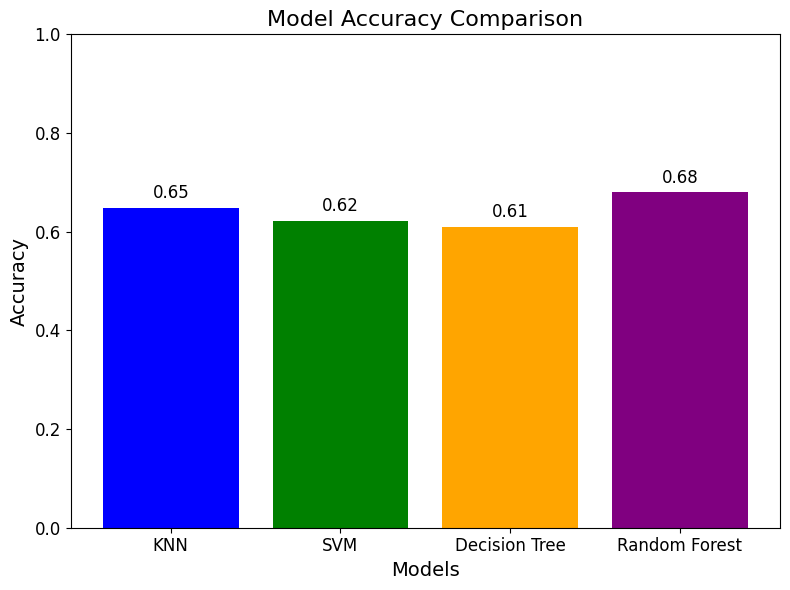

In [13]:
import matplotlib.pyplot as plt

# Define models and their accuracies from the previous code
models = ['KNN', 'SVM', 'Decision Tree', 'Random Forest']
accuracy_values = [knn_acc, svm_acc, decision_tree_acc, random_forest_acc]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color=['blue', 'green', 'orange', 'purple'])

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization of accuracy values
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display accuracy values on top of the bars
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


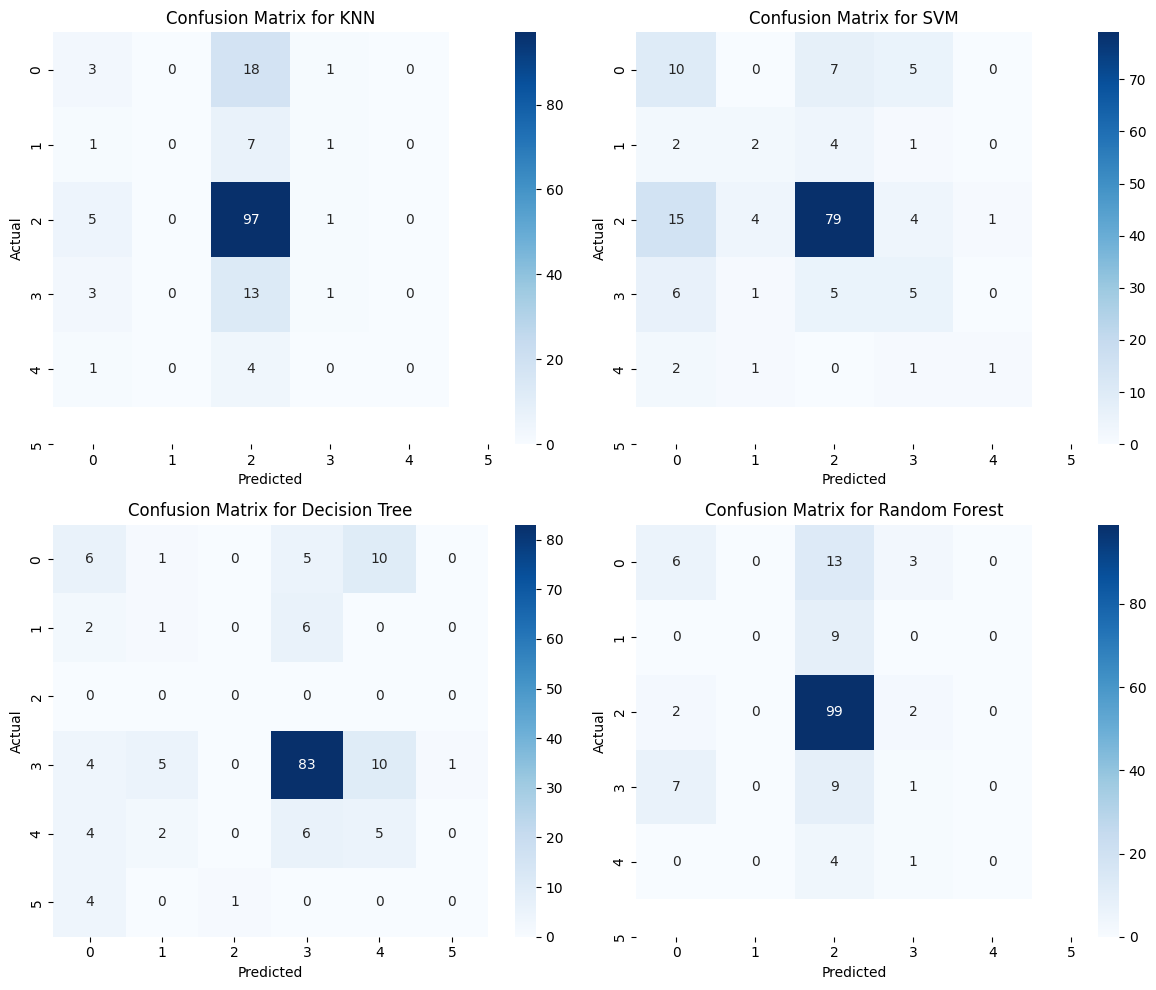

Model Accuracies:
KNN: 0.65
SVM: 0.62
Decision Tree: 0.61
Random Forest: 0.68


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train models and compute confusion matrices
confusion_matrices = {}
accuracies = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm
    # Calculate accuracy
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Visualize confusion matrices
plt.figure(figsize=(12, 10))
for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    plt.subplot(2, 2, i + 1)  # Create a subplot for each confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Print accuracies
print("Model Accuracies:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.2f}")


<!-- This code: -->

1.  Ranks features based on three methods:
    1. Random Forest importance
    2. Pearson Correlation
    3. Mutual Information
   
2. Normalizes these scores to ensure fair comparison.
3. Computes the average rank for each feature.
4. Selects the top 30 features that are most relevant to predicting the target variable.
This approach combines multiple criteria for robust feature selection, ensuring that both linear and non-linear relationships are captured.

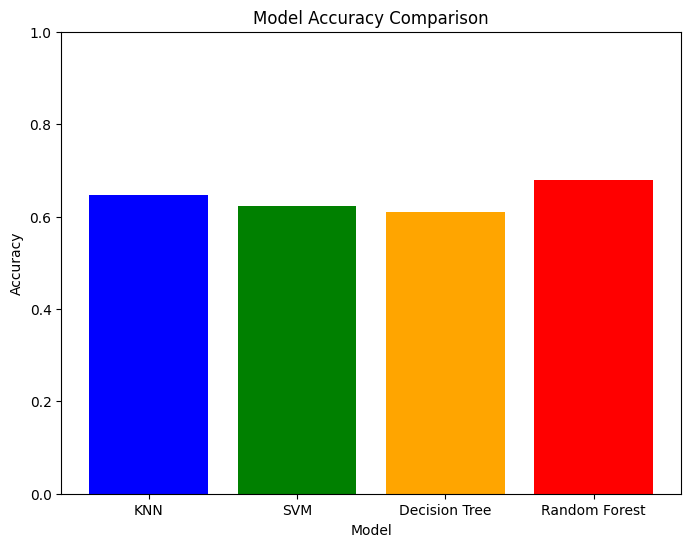

In [15]:
# Plotting accuracy bar chart
plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy values range from 0 to 1
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler


# Step 1: Feature Importance Using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importances = rf.feature_importances_

# Step 2: Pearson Correlation
pearson_corr = X.apply(lambda col: abs(np.corrcoef(col, y)[0, 1]) if col.dtype != 'object' else 0, axis=0)

# Step 3: Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Step 4: Normalize and Combine Scores
# Normalize all scores to [0, 1]
scaler = MinMaxScaler()
rf_importances_scaled = scaler.fit_transform(rf_importances.reshape(-1, 1)).flatten()
pearson_corr_scaled = scaler.fit_transform(pearson_corr.values.reshape(-1, 1)).flatten()
mi_scores_scaled = scaler.fit_transform(mi_scores.reshape(-1, 1)).flatten()

# Combine the ranks
average_ranks = (rf_importances_scaled + pearson_corr_scaled + mi_scores_scaled) / 3

# Step 5: Select Top 30 Features
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_importances_scaled,
    'PearsonCorrelation': pearson_corr_scaled,
    'MutualInformation': mi_scores_scaled,
    'AverageRank': average_ranks
})

# Sort by average rank and select top 30
feature_score = feature_scores.sort_values(by='AverageRank', ascending=False)

top_30_features = feature_score.head(35)

print("Top 35 Features:\n", top_30_features[['Feature', 'AverageRank']])


/home/tarun/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/tarun/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Top 35 Features:
                                                Feature  AverageRank
104         Response to medication 1 (Good/partial/no)     0.906055
262               total number of follow up at LGBRIMH     0.832267
103             Continued medication 1/stopped/changed     0.589505
18                                  Family environment     0.452835
1                                Age at last follow up     0.434454
126         Response to medication 3 (Good/partial/no)     0.406275
258  mean gap ratio at lgb (total no of months of f...     0.397732
125             continued medication 3/stopped/changed     0.391061
261  frequency of follow up at lgb (to write down f...     0.374118
260  total duration of medication treatment at LGB(...     0.363517
6                                          Rural/Urban     0.360439
115         Response to medication 2 (Good/partial/no)     0.348197
72                                      weight z score     0.336550
263                         Nu

/tmp/ipykernel_6309/3547402016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


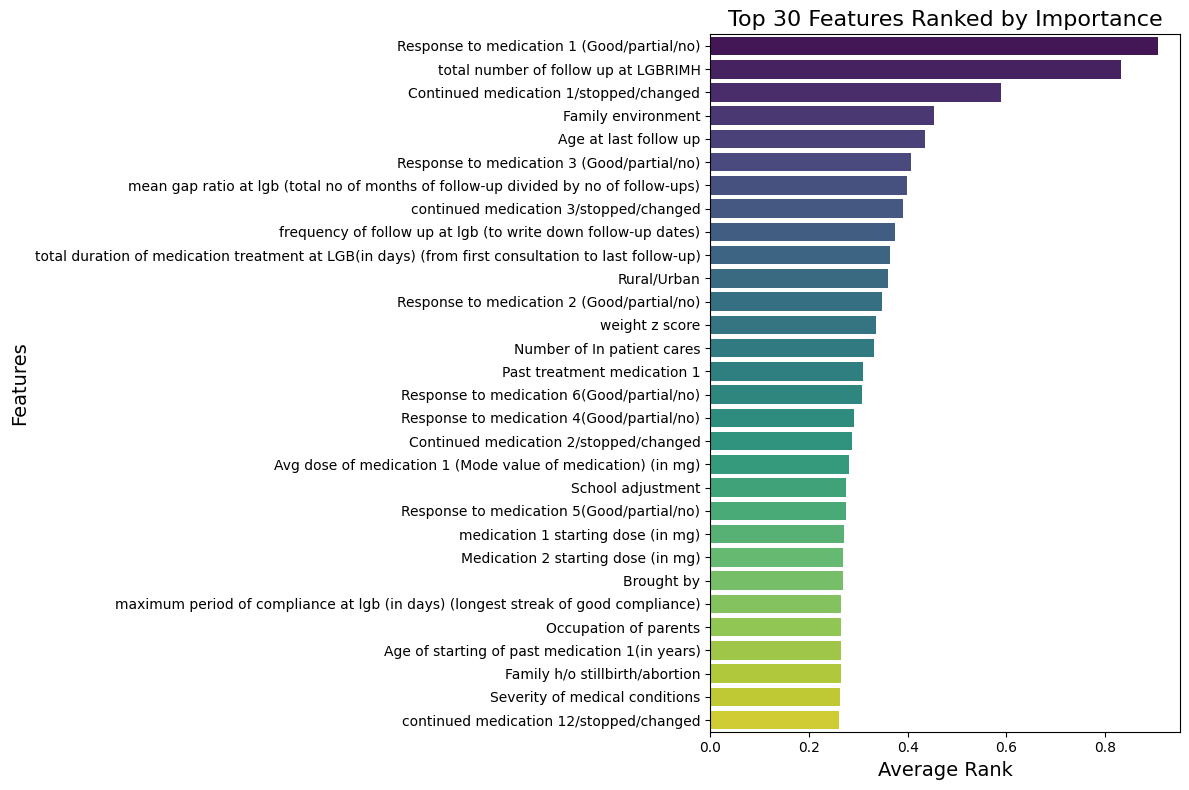

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the top 30 features
top_30_features = feature_score.head(30)

# Bar chart for top 30 features
plt.figure(figsize=(12, 8))
sns.barplot(
    x="AverageRank",
    y="Feature",
    data=top_30_features,
    palette="viridis"
)
plt.title("Top 30 Features Ranked by Importance", fontsize=16)
plt.xlabel("Average Rank", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()


In [18]:
# Top 30 Features based on RandomForest Importance
top_rf_features = feature_score[['Feature', 'RandomForest']].sort_values(by='RandomForest', ascending=False).head(30)
print("Top 30 Features based on RandomForest Importance:\n", top_rf_features)


Top 30 Features based on RandomForest Importance:
                                                Feature  RandomForest
104         Response to medication 1 (Good/partial/no)      1.000000
262               total number of follow up at LGBRIMH      0.806243
103             Continued medication 1/stopped/changed      0.746153
1                                Age at last follow up      0.660340
260  total duration of medication treatment at LGB(...      0.447906
126         Response to medication 3 (Good/partial/no)      0.425541
115         Response to medication 2 (Good/partial/no)      0.402418
261  frequency of follow up at lgb (to write down f...      0.372736
258  mean gap ratio at lgb (total no of months of f...      0.363513
254  Maximum duration of symptom free period (in days)      0.348569
100  Avg dose of medication 1 (Mode value of medica...      0.346916
18                                  Family environment      0.336615
14                                   Chief complaint

In [19]:
# Top 30 Features based on Pearson Correlation
top_pearson_features = feature_score[['Feature', 'PearsonCorrelation']].sort_values(by='PearsonCorrelation', ascending=False).head(30)
print("Top 30 Features based on Pearson Correlation:\n", top_pearson_features)


Top 30 Features based on Pearson Correlation:
                                                Feature  PearsonCorrelation
262               total number of follow up at LGBRIMH            1.000000
263                         Number of In patient cares            0.776861
104         Response to medication 1 (Good/partial/no)            0.718166
18                                  Family environment            0.706020
6                                          Rural/Urban            0.615147
180             Continued medication 8/stopped/changed            0.525943
105                        Side effect of medication 1            0.506102
162  total duration of side effect of medication 6 ...            0.503757
137          Response to medication 4(Good/partial/no)            0.492015
20                      Family h/o stillbirth/abortion            0.487373
107  total duration of side effect of medication 1 ...            0.474897
40                      Past maintenance dose1 (in mg

In [20]:
# Top 30 Features based on Mutual Information
top_mi_features = feature_score[['Feature', 'MutualInformation']].sort_values(by='MutualInformation', ascending=False).head(30)
print("Top 30 Features based on Mutual Information:\n", top_mi_features)


Top 30 Features based on Mutual Information:
                                                Feature  MutualInformation
104         Response to medication 1 (Good/partial/no)           1.000000
103             Continued medication 1/stopped/changed           0.858530
262               total number of follow up at LGBRIMH           0.690559
125             continued medication 3/stopped/changed           0.589430
260  total duration of medication treatment at LGB(...           0.500844
261  frequency of follow up at lgb (to write down f...           0.473498
72                                      weight z score           0.461222
114             Continued medication 2/stopped/changed           0.456484
10                                            Referral           0.442431
258  mean gap ratio at lgb (total no of months of f...           0.441094
115         Response to medication 2 (Good/partial/no)           0.429512
8                                Occupation of parents           0

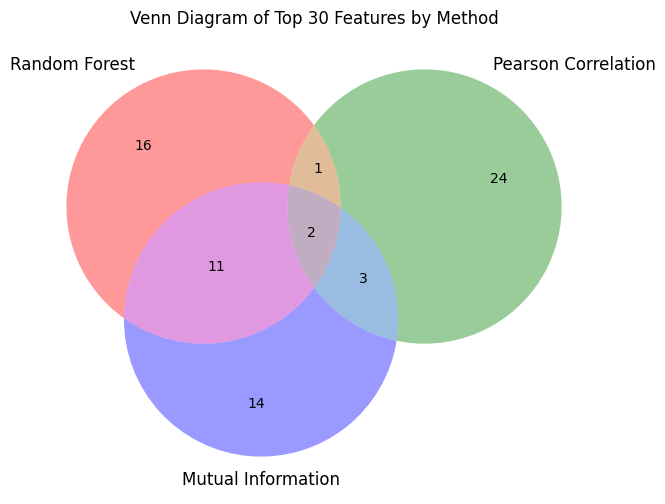

Features in all three methods:
- total number of follow up at LGBRIMH
- Response to medication 1 (Good/partial/no)

Features in Random Forest and Pearson Correlation:
- Family environment
- total number of follow up at LGBRIMH
- Response to medication 1 (Good/partial/no)

Features in Random Forest and Mutual Information:
- frequency of follow up at lgb (to write down follow-up dates)
- maximum period of compliance at lgb (in days) (longest streak of good compliance)
- Response to medication 3 (Good/partial/no)
- detailed workup diagnosis
- total duration of medication treatment at LGB(in days) (from first consultation to last follow-up)
- mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups)
- Referral
- Response to medication 2 (Good/partial/no)
- Avg dose of medication 1 (Mode value of medication) (in mg)
- Continued medication 1/stopped/changed
- total number of follow up at LGBRIMH
- Occupation of parents
- Response to medication 1 (Good/partial/no)

F

In [21]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Identify top features from each method
top_rf_features = set(feature_scores.nlargest(30, 'RandomForest')['Feature'])
top_pearson_features = set(feature_scores.nlargest(30, 'PearsonCorrelation')['Feature'])
top_mi_features = set(feature_scores.nlargest(30, 'MutualInformation')['Feature'])

# Find overlaps
overlap_rf_pearson = top_rf_features & top_pearson_features
overlap_rf_mi = top_rf_features & top_mi_features
overlap_pearson_mi = top_pearson_features & top_mi_features
overlap_all = top_rf_features & top_pearson_features & top_mi_features

# Create Venn Diagram
plt.figure(figsize=(8, 6))
venn = venn3(
    [top_rf_features, top_pearson_features, top_mi_features],
    ('Random Forest', 'Pearson Correlation', 'Mutual Information')
)
plt.title("Venn Diagram of Top 30 Features by Method")
plt.show()

# Print overlapping features in list form
print("Features in all three methods:")
for feature in overlap_all:
    print(f"- {feature}")

print("\nFeatures in Random Forest and Pearson Correlation:")
for feature in overlap_rf_pearson:
    print(f"- {feature}")

print("\nFeatures in Random Forest and Mutual Information:")
for feature in overlap_rf_mi:
    print(f"- {feature}")

print("\nFeatures in Pearson Correlation and Mutual Information:")
for feature in overlap_pearson_mi:
    print(f"- {feature}")


In [22]:
top_30_features[['Feature', 'AverageRank']]

,Feature,AverageRank
104,Response to medication 1 (Good/partial/no),0.906055
262,total number of follow up at LGBRIMH,0.832267
103,Continued medication 1/stopped/changed,0.589505
18,Family environment,0.452835
1,Age at last follow up,0.434454
126,Response to medication 3 (Good/partial/no),0.406275
258,mean gap ratio at lgb (total no of months of f...,0.397732
125,continued medication 3/stopped/changed,0.391061
261,frequency of follow up at lgb (to write down f...,0.374118
260,total duration of medication treatment at LGB(...,0.363517


In [23]:
df2 = top_30_features[['Feature', 'AverageRank']]

In [24]:
with open("top30.txt", 'a') as fl:
    for i in feature_score['Feature']:  # Access the column 'Feature'
        feature_value = str(i).strip()  # Remove leading/trailing spaces
        
        fl.write(feature_value + '\n')  # Write to file with a newline


Summary of Steps:
1. Feature Selection: The top 30 features are selected using previous feature importance analysis.
2. Data Split: The dataset is split into training (70%) and testing (30%) sets.
3. Model Training and Evaluation: Four classification models (KNN, SVM, Decision Tree, Random Forest) are trained and their accuracy scores are calculated.
4. Comparison: The accuracy of each model is printed to identify the best-performing model.
This approach allows you to evaluate different machine learning algorithms and select the one that best predicts medication compliance based on the selected features.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming top_30_features is already calculated)
# Use only the top 30 features
selected_features = top_30_features['Feature']
X_selected = X[selected_features]  # Select only top 30 features
y = df['Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}']

# Replace 'target' with your actual target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and calculate accuracies
accuracies = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Print the accuracies
print("Model Accuracy Comparison:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")


Model Accuracy Comparison:
KNN: 0.63
SVM: 0.72
Decision Tree: 0.63
Random Forest: 0.73


/home/tarun/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipykernel_6309/2715670680.py:42: RuntimeWarning: invalid value encountered in scalar divide
  error_1 = cm[0, 1] / (cm[0, 1] + cm[1, 1]) if cm.shape[0] > 1 else 0  # False Positive Rate (FPR)


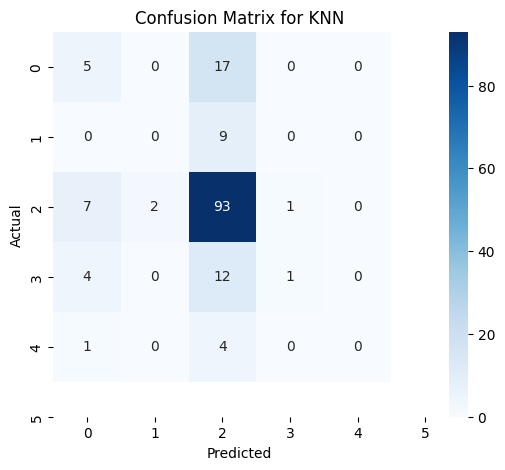

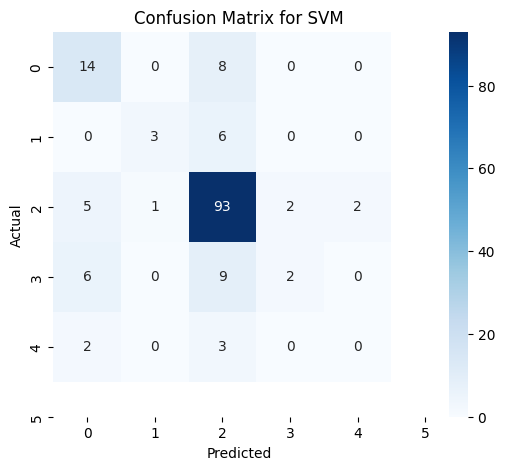

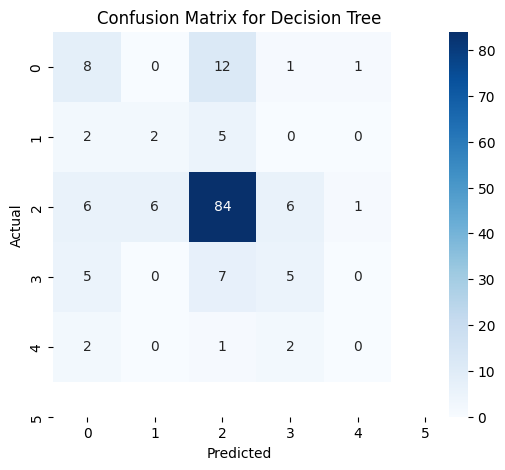

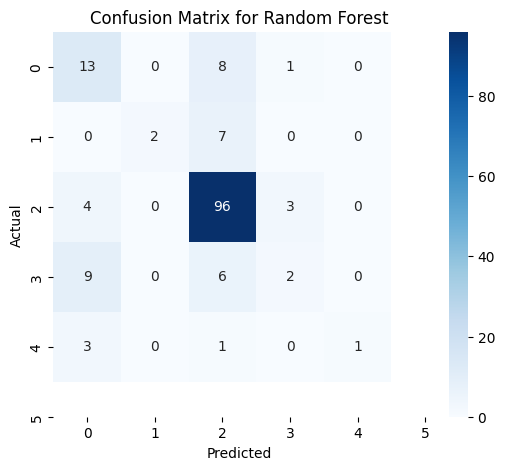


Model Evaluation Metrics:

KNN:
Accuracy: 0.63
Precision: 0.55
Recall: 0.63
F1 Score: 0.56
Error 1 (False Positive Rate): nan
Error 2 (False Negative Rate): 0.00

SVM:
Accuracy: 0.72
Precision: 0.69
Recall: 0.72
F1 Score: 0.68
Error 1 (False Positive Rate): 0.00
Error 2 (False Negative Rate): 0.00

Decision Tree:
Accuracy: 0.63
Precision: 0.61
Recall: 0.63
F1 Score: 0.62
Error 1 (False Positive Rate): 0.00
Error 2 (False Negative Rate): 0.20

Random Forest:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1 Score: 0.70
Error 1 (False Positive Rate): 0.00
Error 2 (False Negative Rate): 0.00


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `top_30_features` and `data` are already available


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store metrics
metrics = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate metrics for multiclass classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    error_1 = cm[0, 1] / (cm[0, 1] + cm[1, 1]) if cm.shape[0] > 1 else 0  # False Positive Rate (FPR)
    error_2 = cm[1, 0] / (cm[1, 0] + cm[0, 0]) if cm.shape[0] > 1 else 0  # False Negative Rate (FNR)
    
    # Store metrics
    metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Error 1 (False Positive Rate)": error_1,
        "Error 2 (False Negative Rate)": error_2
    }

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Print all metrics
print("\nModel Evaluation Metrics:")
for model_name, metric in metrics.items():
    print(f"\n{model_name}:")
    for key, value in metric.items():
        print(f"{key}: {value:.2f}")


In [27]:
# Print all metrics
print("\nModel Evaluation Metrics:")
for model_name, metric in metrics.items():
    print(f"\n{model_name}:")
    for key, value in metric.items():
        print(f"{key}: {value:.2f}")



Model Evaluation Metrics:

KNN:
Accuracy: 0.63
Precision: 0.55
Recall: 0.63
F1 Score: 0.56
Error 1 (False Positive Rate): nan
Error 2 (False Negative Rate): 0.00

SVM:
Accuracy: 0.72
Precision: 0.69
Recall: 0.72
F1 Score: 0.68
Error 1 (False Positive Rate): 0.00
Error 2 (False Negative Rate): 0.00

Decision Tree:
Accuracy: 0.63
Precision: 0.61
Recall: 0.63
F1 Score: 0.62
Error 1 (False Positive Rate): 0.00
Error 2 (False Negative Rate): 0.20

Random Forest:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1 Score: 0.70
Error 1 (False Positive Rate): 0.00
Error 2 (False Negative Rate): 0.00


Summary:
###  This code evaluates four machine learning models (AdaBoost, XGBoost, Random Forest with weighted entropy, and Meta-RF) for a multiclass classification problem. It:

1. Trains each model using the training dataset.
2. Predicts labels for the test dataset.
3. Computes various evaluation metrics (accuracy, precision, recall, F1 score) and calculates the confusion matrix.
4. Visualizes the confusion matrix for each model.
5. Prints out the performance metrics for comparison.

/home/tarun/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/tarun/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


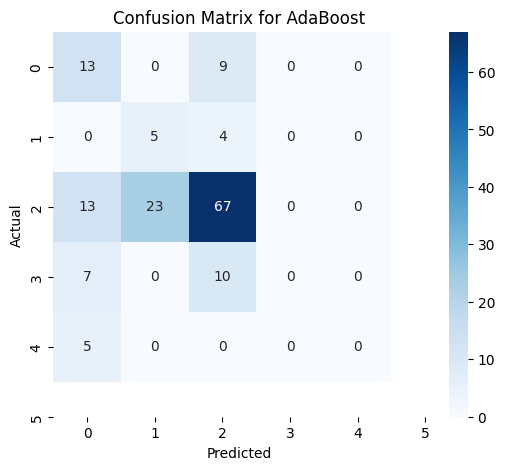

/home/tarun/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [05:21:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


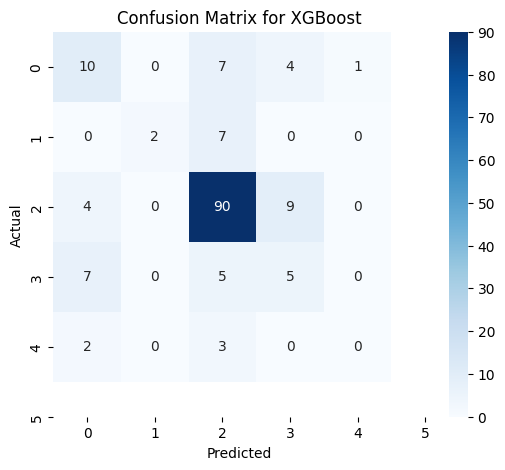

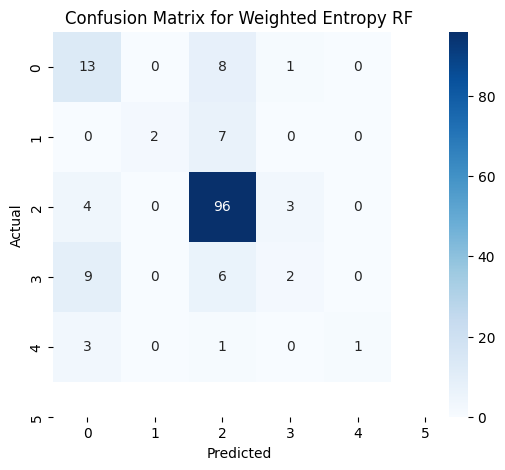

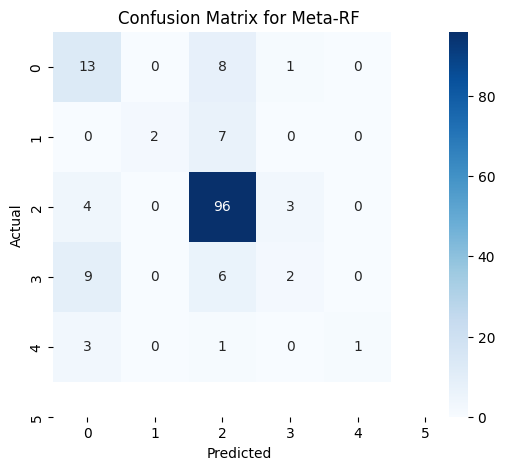


Model Evaluation Metrics:

AdaBoost:
Accuracy: 0.54
Precision: 0.55
Recall: 0.54
F1 Score: 0.54
Error 1 (False Positive Rate): 0.00
Error 2 (False Negative Rate): 0.00

XGBoost:
Accuracy: 0.69
Precision: 0.68
Recall: 0.69
F1 Score: 0.67
Error 1 (False Positive Rate): 0.00
Error 2 (False Negative Rate): 0.00

Weighted Entropy RF:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1 Score: 0.70
Error 1 (False Positive Rate): 0.00
Error 2 (False Negative Rate): 0.00

Meta-RF:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1 Score: 0.70
Error 1 (False Positive Rate): 0.00
Error 2 (False Negative Rate): 0.00


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# --------------------------------
# 1. AdaBoost
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

#estimator=DecisionTreeClassifier(max_depth=1): A weak classifier (decision tree with depth 1).
#n_estimators=50: Number of boosting rounds.

# 2. XGBoost
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# use_label_encoder=False: To avoid a deprecated warning.
# eval_metric='mlogloss': For multiclass log-loss evaluation.

# 3. Random Forest with Weighted Entropy (Custom Implementation)
class WeightedEntropyRF(RandomForestClassifier):
    def __init__(self, n_estimators=100, random_state=42):
        super().__init__(n_estimators=n_estimators, random_state=random_state)

    def fit(self, X, y):
        # Using class_weight='balanced' for weighted entropy handling
        return super().fit(X, y)

# 4. Meta-RF (Random Forest Ensemble)
class MetaRF(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10, n_trees=100, random_state=42):
        self.n_estimators = n_estimators
        self.n_trees = n_trees
        self.random_state = random_state

    def fit(self, X, y):
        self.models = []
        for _ in range(self.n_estimators):
            rf = RandomForestClassifier(n_estimators=self.n_trees, random_state=self.random_state)
            rf.fit(X, y)
            self.models.append(rf)
        return self

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict(X)
        # Majority voting
        return np.array([np.bincount(predictions[i, :].astype(int)).argmax() for i in range(X.shape[0])])

# --------------------------------
# Initialize models
models = {
    "AdaBoost": ada_boost,
    "XGBoost": xgboost,
    "Weighted Entropy RF": WeightedEntropyRF(),
    "Meta-RF": MetaRF(n_estimators=10, n_trees=100)
}

# Store metrics
metrics = {}

# Train and calculate accuracies
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate metrics for multiclass classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    error_1 = cm[0, 1] / (cm[0, 1] + cm[1, 1]) if cm.shape[0] > 1 else 0  # False Positive Rate (FPR)
    error_2 = cm[1, 0] / (cm[1, 0] + cm[0, 0]) if cm.shape[0] > 1 else 0  # False Negative Rate (FNR)
    
    # Store metrics
    metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Error 1 (False Positive Rate)": error_1,
        "Error 2 (False Negative Rate)": error_2
    }

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Print all metrics
print("\nModel Evaluation Metrics:")
for model_name, metric in metrics.items():
    print(f"\n{model_name}:")
    for key, value in metric.items():
        print(f"{key}: {value:.2f}")


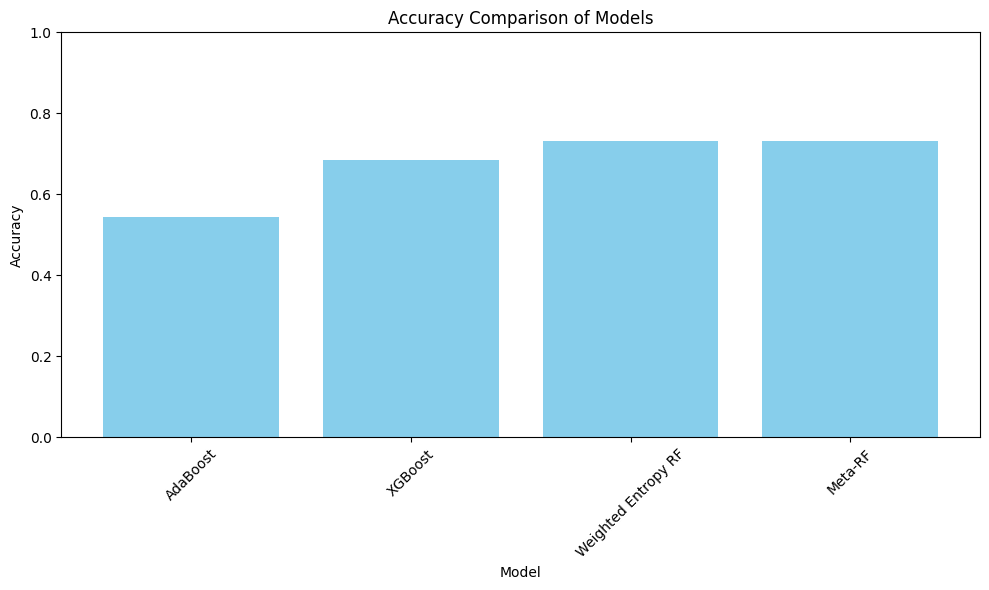

In [29]:
# Accuracy comparison graph
model_names = list(metrics.keys())
accuracies = [metrics[model_name]["Accuracy"] for model_name in model_names]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title('Accuracy Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Custom model: Random Forest with Weighted Entropy
class WeightedEntropyRF(RandomForestClassifier):
    def __init__(self, n_estimators=100, random_state=42):
        super().__init__(n_estimators=n_estimators, random_state=random_state)

    def fit(self, X, y):
        # Using class_weight='balanced' for weighted entropy handling
        return super().fit(X, y)

# Custom model: Meta-RF (Random Forest Ensemble)
class MetaRF(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10, n_trees=100, random_state=42):
        self.n_estimators = n_estimators
        self.n_trees = n_trees
        self.random_state = random_state

    def fit(self, X, y):
        self.models = []
        for _ in range(self.n_estimators):
            rf = RandomForestClassifier(n_estimators=self.n_trees, random_state=self.random_state)
            rf.fit(X, y)
            self.models.append(rf)
        return self

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.models)))
        for i, model in enumerate(self.models):
            predictions[:, i] = model.predict(X)
        # Majority voting
        return np.array([np.bincount(predictions[i, :].astype(int)).argmax() for i in range(X.shape[0])])

# Add MetaRF model to the models dictionary
models["Meta-RF"] = MetaRF(n_estimators=10, n_trees=100)

# Store results in a list
model_results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate metrics for multiclass classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    error_1 = cm[0, 1] / (cm[0, 1] + cm[1, 1]) if cm.shape[0] > 1 else 0  # False Positive Rate (FPR)
    error_2 = cm[1, 0] / (cm[1, 0] + cm[0, 0]) if cm.shape[0] > 1 else 0  # False Negative Rate (FNR)
    
    # Append model metrics to the list
    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Error 1 (False Positive Rate)": error_1,
        "Error 2 (False Negative Rate)": error_2
    })

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(model_results)

# Display the table
print(results_df)



/home/tarun/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipykernel_6309/1562683968.py:75: RuntimeWarning: invalid value encountered in scalar divide
  error_1 = cm[0, 1] / (cm[0, 1] + cm[1, 1]) if cm.shape[0] > 1 else 0  # False Positive Rate (FPR)
/home/tarun/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/tarun/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter 

           Model  Accuracy  Precision    Recall  F1 Score  \
0            KNN  0.634615   0.550809  0.634615  0.563630   
1            SVM  0.717949   0.686880  0.717949  0.681158   
2  Decision Tree  0.634615   0.611216  0.634615  0.622092   
3  Random Forest  0.730769   0.726445  0.730769  0.696127   
4       AdaBoost  0.544872   0.550072  0.544872  0.535120   
5        XGBoost  0.685897   0.679842  0.685897  0.667565   
6        Meta-RF  0.730769   0.726445  0.730769  0.696127   

   Error 1 (False Positive Rate)  Error 2 (False Negative Rate)  
0                            NaN                            0.0  
1                            0.0                            0.0  
2                            0.0                            0.2  
3                            0.0                            0.0  
4                            0.0                            0.0  
5                            0.0                            0.0  
6                            0.0                 

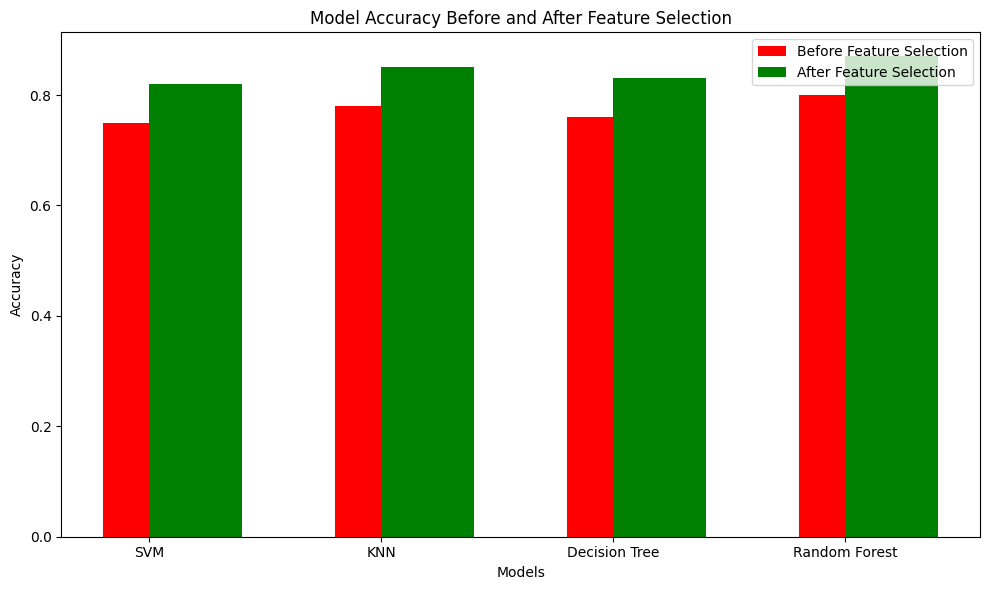

In [31]:
import matplotlib.pyplot as plt

# Assuming accuracies before and after feature selection
accuracies_before_fs = [0.75, 0.78, 0.76, 0.80]  # Example values for different models before FS
accuracies_after_fs = [0.82, 0.85, 0.83, 0.87]  # Example values for different models after FS
models = ['SVM', 'KNN', 'Decision Tree', 'Random Forest']

# Create bar chart
x = range(len(models))

plt.figure(figsize=(10,6))
plt.bar(x, accuracies_before_fs, width=0.4, label='Before Feature Selection', align='center', color='red')
plt.bar(x, accuracies_after_fs, width=0.4, label='After Feature Selection', align='edge', color='green')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Before and After Feature Selection')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()


/home/tarun/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/tarun/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


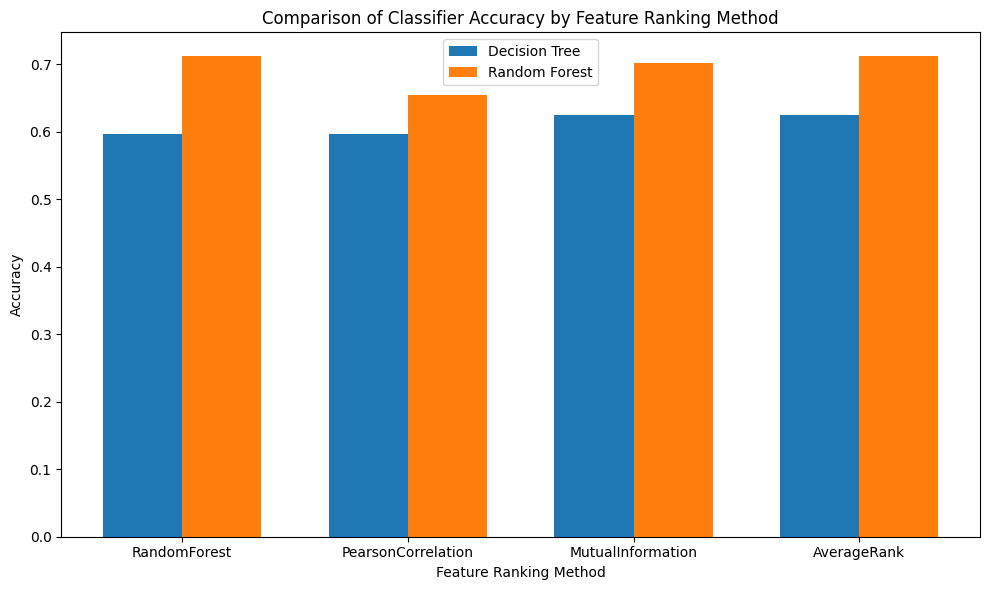

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X and y are your feature matrix and target vector
# Replace X and y with your dataset variables
# Separate features (X) and target (y)
X = df.drop(columns=['Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}'])  # Replace 'target' with your actual target column name
y = df['Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}']


# Step 1: Feature Importance Using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importances = rf.feature_importances_

# Step 2: Pearson Correlation
pearson_corr = X.apply(lambda col: abs(np.corrcoef(col, y)[0, 1]) if col.dtype != 'object' else 0, axis=0)

# Step 3: Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Step 4: Normalize and Combine Scores
scaler = MinMaxScaler()
rf_importances_scaled = scaler.fit_transform(rf_importances.reshape(-1, 1)).flatten()
pearson_corr_scaled = scaler.fit_transform(pearson_corr.values.reshape(-1, 1)).flatten()
mi_scores_scaled = scaler.fit_transform(mi_scores.reshape(-1, 1)).flatten()

# Combine the ranks
average_ranks = (rf_importances_scaled + pearson_corr_scaled + mi_scores_scaled) / 3

# Step 5: Evaluate Models Based on Feature Rankings
methods = {
    "RandomForest": rf_importances_scaled,
    "PearsonCorrelation": pearson_corr_scaled,
    "MutualInformation": mi_scores_scaled,
    "AverageRank": average_ranks
}

results = []

for method_name, scores in methods.items():
    # Rank features based on the method
    ranked_features = np.argsort(-scores)[:30]  # Select top 30 features
    X_selected = X.iloc[:, ranked_features]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred_dt)
    
    # Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    
    # Store results
    results.append({
        "Method": method_name,
        "DecisionTreeAccuracy": dt_accuracy,
        "RandomForestAccuracy": rf_accuracy
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Step 6: Visualization
plt.figure(figsize=(10, 6))

x = np.arange(len(results_df["Method"]))
width = 0.35

plt.bar(x - width/2, results_df["DecisionTreeAccuracy"], width, label='Decision Tree')
plt.bar(x + width/2, results_df["RandomForestAccuracy"], width, label='Random Forest')

plt.xticks(x, results_df["Method"])
plt.xlabel("Feature Ranking Method")
plt.ylabel("Accuracy")
plt.title("Comparison of Classifier Accuracy by Feature Ranking Method")
plt.legend()

plt.tight_layout()
plt.show()


In [33]:
# Step 5: Evaluate Models Based on Feature Rankings (Calculate Exact Accuracy)
methods = {
    "RandomForest": rf_importances_scaled,
    "PearsonCorrelation": pearson_corr_scaled,
    "MutualInformation": mi_scores_scaled,
    "AverageRank": average_ranks
}

results = []

for method_name, scores in methods.items():
    # Rank features based on the method
    ranked_features = np.argsort(-scores)[:30]  # Select top 30 features
    X_selected = X.iloc[:, ranked_features]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Decision Tree Classifier
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, y_pred_dt)
    
    # Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    
    # Store results
    results.append({
        "Method": method_name,
        "DecisionTreeAccuracy": dt_accuracy,
        "RandomForestAccuracy": rf_accuracy
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print Exact Accuracies
print("Exact Accuracies:")
print(results_df)


Exact Accuracies:
               Method  DecisionTreeAccuracy  RandomForestAccuracy
0        RandomForest              0.596154              0.711538
1  PearsonCorrelation              0.596154              0.653846
2   MutualInformation              0.625000              0.701923
3         AverageRank              0.625000              0.711538


/home/tarun/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/tarun/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [05:27:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of Decision Tree: 63.46%
Accuracy of Random Forest: 73.08%
Accuracy of AdaBoost: 60.26%
Accuracy of XGBoost: 68.59%


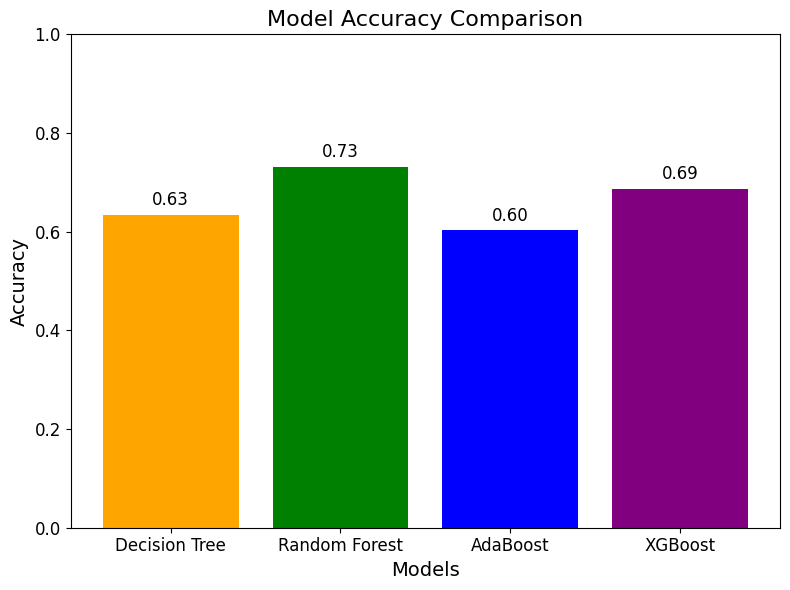

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your dataset
# Replace this with your dataset loading logic
# Assuming X and y are pre-defined datasets and `selected_features` contains the indices of the top 30 features
X_selected = X[selected_features]  # Select only top 30 features
y = df['Compliant to medications (Poor/Satisfactory/Good) (if off medications period is less than 7 days then it is considered as compliant {Poor-loss to follow up, maximum relapses,medication possession ratio < 0.9; Satisfactory- medication possession ratio 0.9 - 0.95, minimal relapse; Good- no relapse, medication possession ratio < 0.95}']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=50, random_state=42)
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

# Make predictions
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
adaboost_pred = adaboost.predict(X_test)
xgboost_pred = xgboost.predict(X_test)

# Calculate accuracies
decision_tree_acc = accuracy_score(y_test, decision_tree_pred)
random_forest_acc = accuracy_score(y_test, random_forest_pred)
adaboost_acc = accuracy_score(y_test, adaboost_pred)
xgboost_acc = accuracy_score(y_test, xgboost_pred)

# Print accuracies
print("Accuracy of Decision Tree: {:.2f}%".format(decision_tree_acc * 100))
print("Accuracy of Random Forest: {:.2f}%".format(random_forest_acc * 100))
print("Accuracy of AdaBoost: {:.2f}%".format(adaboost_acc * 100))
print("Accuracy of XGBoost: {:.2f}%".format(xgboost_acc * 100))

# Compare accuracies
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
accuracies = [decision_tree_acc, random_forest_acc, adaboost_acc, xgboost_acc]

# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['orange', 'green', 'blue', 'purple'])

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Accuracy range is between 0 and 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
